# ***Stock Price Prediction with Machine Learning***  
   
In this Data Science Projetc we will create a Linear Regression model and a Decision Tree Regression Model to Predict Apple'Stock Price using Machine Learning and Python.  


In [50]:
import pandas as pd
apple = pd.read_csv("/content/AAPL.csv")
print(apple.head())

         Date      Open      High       Low     Close  Adj Close       Volume
0  1980-12-12  0.128348  0.128906  0.128348  0.128348   0.100922  469033600.0
1  1980-12-15  0.122210  0.122210  0.121652  0.121652   0.095657  175884800.0
2  1980-12-16  0.113281  0.113281  0.112723  0.112723   0.088636  105728000.0
3  1980-12-17  0.115513  0.116071  0.115513  0.115513   0.090830   86441600.0
4  1980-12-18  0.118862  0.119420  0.118862  0.118862   0.093463   73449600.0


**To get the nnumber of training days** 

In [5]:
print("training days=", apple.shape)

training days= (10164, 7)


In [9]:
apple.describe()

,Open,High,Low,Close,Adj Close,Volume
count,10163.000000,10163.000000,10163.000000,10163.000000,10163.000000,1.016300e+04
mean,10.675220,10.790622,10.555697,10.677065,10.114549,3.381230e+08
std,21.620221,21.870978,21.351233,21.619870,21.301076,3.412080e+08
min,0.049665,0.049665,0.049107,0.049107,0.038614,1.388800e+06
25%,0.274554,0.281250,0.267299,0.273438,0.231107,1.298472e+08
50%,0.446429,0.455179,0.438036,0.446607,0.373143,2.259264e+08
75%,12.000536,12.110179,11.888393,12.004465,10.340207,4.202520e+08
max,143.600006,145.089996,141.369995,143.160004,142.946396,7.421641e+09


**To Visualize the close price Data**

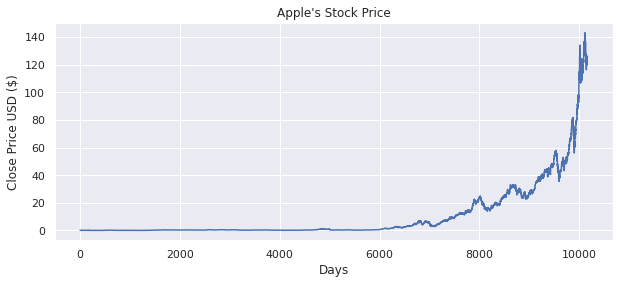

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set()

plt.figure(figsize=(10,4))
plt.title("Apple's Stock Price")
plt.xlabel("Days")
plt.ylabel("Close Price USD ($)")
plt.plot(apple["Close"])
plt.show()

**To get the close price**

In [51]:
apple = apple[['Close']]
apple.head()

,Close
0,0.128348
1,0.121652
2,0.112723
3,0.115513
4,0.118862


Creating a variable to predict 'X' days in the future:

In [93]:
futureDays = 1000

Create a new target column shifted 'X' units/days up:

In [94]:
apple["Prediction"] = apple[["Close"]].shift(-futureDays)
print(apple.head())
print(apple.tail())

      Close  Prediction
0  0.128348    0.107143
1  0.121652    0.109933
2  0.112723    0.115513
3  0.115513    0.113281
4  0.118862    0.110491
            Close  Prediction
10159  119.900002         NaN
10160  122.150002         NaN
10161  123.000000         NaN
10162  125.900002         NaN
10163  126.209999         NaN


In [95]:
apple.fillna(0,inplace=True)

In [96]:
print(apple.head())
print(apple.tail())

      Close  Prediction
0  0.128348    0.107143
1  0.121652    0.109933
2  0.112723    0.115513
3  0.115513    0.113281
4  0.118862    0.110491
            Close  Prediction
10159  119.900002         0.0
10160  122.150002         0.0
10161  123.000000         0.0
10162  125.900002         0.0
10163  126.209999         0.0


To create a future dataset (x) and convert into a numpy array and remove last'x' row/days:

In [97]:
import numpy as np
x = np.array(apple.drop(["Prediction"], 1))[:-futureDays]
print(x)

[[ 0.128348]
 [ 0.121652]
 [ 0.112723]
 ...
 [35.407501]
 [35.450001]
 [35.262501]]


To create a target dataset (y) and convert it to a numpy array and get all of the target values except the last 'x' rows days:

In [98]:
y = np.array(apple["Prediction"])[:-futureDays]
print(y)

[1.07143000e-01 1.09933000e-01 1.15513000e-01 ... 1.23000000e+02
 1.25900002e+02 1.26209999e+02]


***Split the Data into 75% training and 25% testing***

In [99]:
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.25)

#np.where(np.isnan(ytrain))
#ytrain = np.nan_to_num(ytrain)

***Creating Models**

In [100]:
# Creating the decision tree regressor model
from sklearn.tree import DecisionTreeRegressor
tree = DecisionTreeRegressor().fit(xtrain, ytrain)

# creating the Linear Regression model
from sklearn.linear_model import LinearRegression
linear = LinearRegression().fit(xtrain, ytrain)

To get the last 'x' rows/days of the feature dataset:

In [101]:
xfuture = apple.drop(["Prediction"], 1)[:-futureDays]
xfuture = xfuture.tail(futureDays)
xfuture = np.array(xfuture)
print(xfuture)

[[14.9     ]
 [15.361429]
 [15.813571]
 [15.688929]
 [15.911429]
 [16.070715]
 [16.45393 ]
 [16.380714]
 [16.565714]
 [16.313213]
 [16.1775  ]
 [16.240713]
 [15.852143]
 [15.316071]
 [15.520714]
 [15.473571]
 [15.818929]
 [15.702143]
 [15.7625  ]
 [15.790714]
 [15.898214]
 [15.765714]
 [15.891071]
 [16.127857]
 [16.061787]
 [16.097143]
 [16.046785]
 [15.896786]
 [15.659286]
 [15.778929]
 [15.674643]
 [15.628571]
 [15.435357]
 [15.57    ]
 [15.358929]
 [15.428571]
 [15.420357]
 [15.107143]
 [14.887143]
 [14.767857]
 [14.376429]
 [14.379643]
 [14.216786]
 [14.063571]
 [14.161786]
 [14.615   ]
 [14.946071]
 [15.028571]
 [14.907857]
 [14.823214]
 [15.083929]
 [15.026071]
 [15.260357]
 [15.2325  ]
 [15.265714]
 [15.364286]
 [15.368214]
 [15.42    ]
 [15.176786]
 [15.225357]
 [14.963929]
 [15.7325  ]
 [15.660714]
 [15.749643]
 [15.9925  ]
 [16.190001]
 [16.161785]
 [16.309999]
 [16.519285]
 [16.766071]
 [16.616072]
 [16.606428]
 [16.464643]
 [16.230356]
 [16.691429]
 [17.484644]
 [17.803572]

***To see the model Prediction***

In [102]:
# Tree prediction
treePrediction = tree.predict(xfuture)
print("Decision Tree prediction =", treePrediction)

# Linear Regression
linearPrediction = linear.predict(xfuture)
print("Linear Regression Prediction=", linearPrediction)

Decision Tree prediction = [ 35.4575      35.299999    35.169998    38.4175      35.567501
  35.91        36.1325      29.997499    35.947498    35.912498
  37.755001    36.877499    36.764999    35.365002    37.240002
  38.252499    38.497501    29.76        33.837502    29.9925
  38.334999    33.837502    37.5625      34.9212495   38.264999
  33.029999    33.755001    38.334999    38.467499    38.4025
  38.4175      38.189999    38.294998    38.862499    38.482498
  38.612499    38.842499    38.747501    37.244999    36.355
  36.290001    36.290001    36.072498    29.07        36.584999
  35.262501    26.705       36.407501    36.57        36.355
  35.932499    36.4575      24.3475      36.005001    35.875
  36.022499    35.682499    36.044998    36.264999    36.3825
  26.705       36.942501    38.467499    37.389999    24.1975
  37.755001    34.9212495   37.567501    38.022499    38.185001
  38.365002    37.639999    37.375       34.75        37.512501
  39.285       38.892502    23

***Visualize decision tree prediction***

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


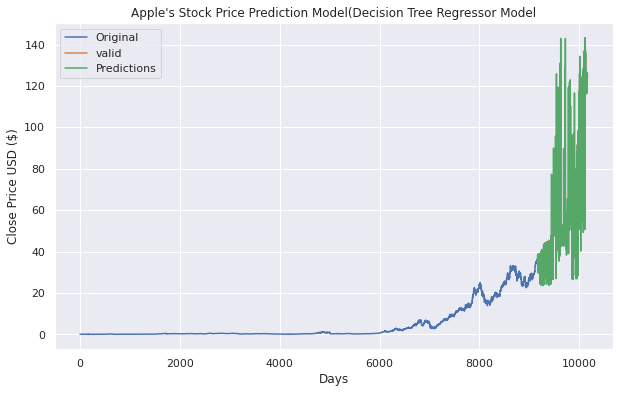

In [103]:
predictions = treePrediction
valid = apple[x.shape[0]:]
valid["Predictions"] = predictions
plt.figure(figsize=(10,6))
plt.title("Apple's Stock Price Prediction Model(Decision Tree Regressor Model")
plt.xlabel("Days")
plt.ylabel("Close Price USD ($)")
plt.plot(apple["Close"])
plt.plot(valid[["Close", "Predictions"]])
plt.legend(["Original", "valid", "Predictions"])
plt.show()

***Visualize the linear model predictions***

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


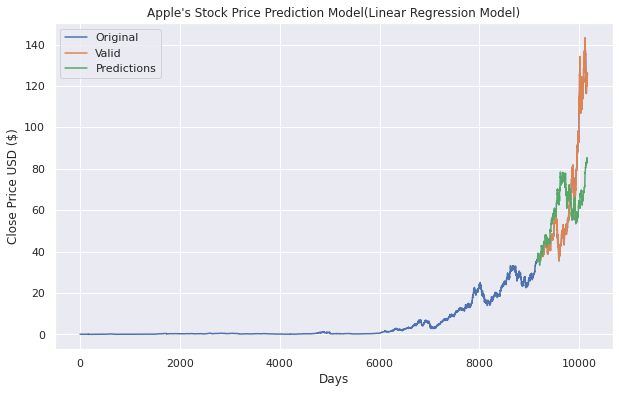

In [104]:
predictions = linearPrediction
valid = apple[x.shape[0]:]
valid["Predictions"] = predictions
plt.figure(figsize=(10, 6))
plt.title("Apple's Stock Price Prediction Model(Linear Regression Model)")
plt.xlabel("Days")
plt.ylabel("Close Price USD ($)")
plt.plot(apple["Close"])
plt.plot(valid[["Close", "Predictions"]])
plt.legend(["Original", "Valid", "Predictions"])
plt.show()